ARIMA Stock Price Forecasting using pmdarima @Author Lukas Eriksson

In [ ]:
#Installing the pmdarima library
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.6 MB/s eta 0:00:00


ARIMA for SP500

[*********************100%***********************]  1 of 1 completed
ORDER FOUND:  (0, 1, 2)
Progress: 1.0%
Progress: 2.0%
Progress: 3.1%
Progress: 4.1%
Progress: 5.1%
Progress: 6.1%
Progress: 7.2%
Progress: 8.2%
Progress: 9.2%
Progress: 10.2%
Progress: 11.3%
Progress: 12.3%
Progress: 13.3%
Progress: 14.3%
Progress: 15.3%
Progress: 16.4%
Progress: 17.4%
Progress: 18.4%
Progress: 19.4%
Progress: 20.5%
Progress: 21.5%
Progress: 22.5%
Progress: 23.5%
Progress: 24.6%
Progress: 25.6%
Progress: 26.6%
Progress: 27.6%
Progress: 28.6%
Progress: 29.7%
Progress: 30.7%
Progress: 31.7%
Progress: 32.7%
Progress: 33.8%
Progress: 34.8%
Progress: 35.8%
Progress: 36.8%
Progress: 37.9%
Progress: 38.9%
Progress: 39.9%
Progress: 40.9%
Progress: 42.0%
Progress: 43.0%
Progress: 44.0%
Progress: 45.0%
Progress: 46.0%
Progress: 47.1%
Progress: 48.1%
Progress: 49.1%
Progress: 50.1%
Progress: 51.2%
Progress: 52.2%
Progress: 53.2%
Progress: 54.2%
Progress: 55.3%
Progress: 56.3%
Progress: 57.3%
Progress: 58.3%
Prog

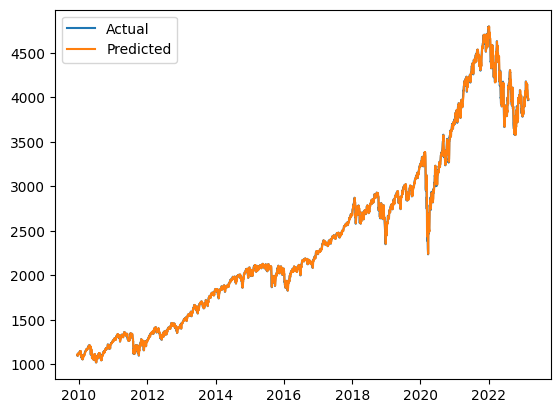

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import pmdarima as pm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from google.colab import files
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

start_date = '1957-03-04'
end_date = '2023-03-01'

sp500_data = pdr.data.get_data_yahoo('^GSPC', start=start_date, end=end_date)

sp500_data = sp500_data[['Close']]

train_size = int(len(sp500_data) * 0.8)
train_data = sp500_data.iloc[:train_size]
test_data = sp500_data.iloc[train_size:]
test_dates = test_data.index

arima_model = pm.auto_arima(train_data['Close'], seasonal=False, suppress_warnings=True)
order = arima_model.order
print("ORDER FOUND: ", order)

predictions = []

training_data = train_data['Close'].values
test_data = test_data['Close']
test_data_index = test_data.index
test_data_array = test_data.values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data_array)

model = pm.ARIMA(order=order)
model.fit(history)
last_progress_percent = 0
for i in range(N_test_observations):
    yhat, _ = model.predict(n_periods=1, return_conf_int=True)
    model_predictions.append(yhat[0])
    obs = test_data_array[i]
    history.append(obs)
    model.update(obs)
    progress_percent = (i+1) / N_test_observations * 100

    # Check if progress has moved by at least 1%
    if progress_percent - last_progress_percent >= 1:
        # Print progress
        print(f"Progress: {progress_percent:.1f}%")

        # Update last progress percentage
        last_progress_percent = progress_percent
errors = np.abs(test_data_array - model_predictions)
mean_absolute_error = errors.mean()
mean_absolute_percentage_error = (errors / test_data_array).mean() * 100
median_absolute_percentage_error = np.median(errors / test_data_array) * 100

print("Mean Absolute Error:", mean_absolute_error)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error)
print("Median Absolute Percentage Error:", median_absolute_percentage_error)


# Save results to a CSV file
csv_filename = f"sp500_predictions_{start_date}_to_{end_date}.csv"

results_df = pd.DataFrame({'Date': test_dates, 'Actual': test_data_array, 'Predicted': model_predictions})
results_df.to_csv(csv_filename, index=False)
plt.plot(test_dates, test_data_array, label='Actual')
plt.plot(test_dates, model_predictions, label='Predicted')
plt.legend()
plt.show()


files.download(csv_filename)

ARIMA for HSI

[*********************100%***********************]  1 of 1 completed
ORDER FOUND:  (0, 1, 0)
Progress: 1.0%
Progress: 2.0%
Progress: 3.0%
Progress: 4.0%
Progress: 5.0%
Progress: 6.0%
Progress: 7.1%
Progress: 8.1%
Progress: 9.1%
Progress: 10.1%
Progress: 11.1%
Progress: 12.1%
Progress: 13.1%
Progress: 14.1%
Progress: 15.1%
Progress: 16.1%
Progress: 17.1%
Progress: 18.1%
Progress: 19.1%
Progress: 20.2%
Progress: 21.2%
Progress: 22.2%
Progress: 23.2%
Progress: 24.2%
Progress: 25.2%
Progress: 26.2%
Progress: 27.2%
Progress: 28.2%
Progress: 29.2%
Progress: 30.2%
Progress: 31.2%
Progress: 32.3%
Progress: 33.3%
Progress: 34.3%
Progress: 35.3%
Progress: 36.3%
Progress: 37.3%
Progress: 38.3%
Progress: 39.3%
Progress: 40.3%
Progress: 41.3%
Progress: 42.3%
Progress: 43.3%
Progress: 44.3%
Progress: 45.4%
Progress: 46.4%
Progress: 47.4%
Progress: 48.4%
Progress: 49.4%
Progress: 50.4%
Progress: 51.4%
Progress: 52.4%
Progress: 53.4%
Progress: 54.4%
Progress: 55.4%
Progress: 56.4%
Progress: 57.4%
Prog

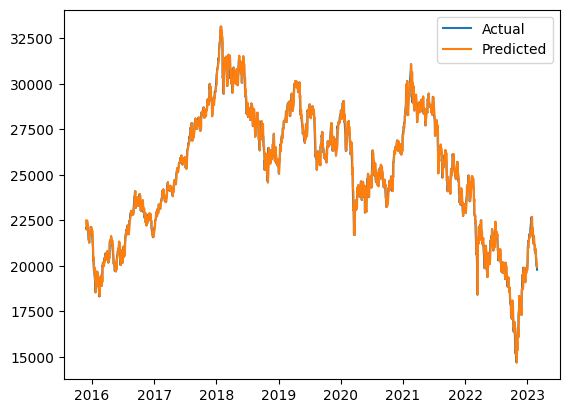

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import pmdarima as pm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from google.colab import files
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

start_date = '1969-11-24'
end_date = '2023-03-01'

hsi_data = pdr.data.get_data_yahoo('^HSI', start=start_date, end=end_date)
hsi_data = hsi_data[['Close']]

train_size = int(len(hsi_data) * 0.8)
train_data = hsi_data.iloc[:train_size]
test_data = hsi_data.iloc[train_size:]
test_dates = test_data.index

arima_model = pm.auto_arima(train_data['Close'], seasonal=False, suppress_warnings=True)
order = arima_model.order
print("ORDER FOUND: ", order)

predictions = []

training_data = train_data['Close'].values
test_data = test_data['Close']
test_data_index = test_data.index
test_data_array = test_data.values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data_array)

model = pm.ARIMA(order=order)
model.fit(history)
last_progress_percent = 0
for i in range(N_test_observations):
    yhat, _ = model.predict(n_periods=1, return_conf_int=True)
    model_predictions.append(yhat[0])
    obs = test_data_array[i]
    history.append(obs)
    model.update(obs)
    progress_percent = (i+1) / N_test_observations * 100

    # Check if progress has moved by at least 1%
    if progress_percent - last_progress_percent >= 1:
        # Print progress
        print(f"Progress: {progress_percent:.1f}%")

        # Update last progress percentage
        last_progress_percent = progress_percent
errors = np.abs(test_data_array - model_predictions)
mean_absolute_error = errors.mean()
mean_absolute_percentage_error = (errors / test_data_array).mean() * 100
median_absolute_percentage_error = np.median(errors / test_data_array) * 100

print("Mean Absolute Error:", mean_absolute_error)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error)
print("Median Absolute Percentage Error:", median_absolute_percentage_error)

# Save results to a CSV file
csv_filename = f"hsi_predictions_{start_date}_to_{end_date}.csv"
results_df = pd.DataFrame({'Date': test_dates, 'Actual': test_data_array, 'Predicted': model_predictions})
results_df.to_csv(csv_filename, index=False)
plt.plot(test_dates, test_data_array, label='Actual')
plt.plot(test_dates, model_predictions, label='Predicted')
plt.legend()
plt.show()

files.download(csv_filename)


ARIMA for DAX

[*********************100%***********************]  1 of 1 completed
ORDER FOUND:  (0, 1, 0)
Progress: 1.0%
Progress: 2.0%
Progress: 3.0%
Progress: 4.0%
Progress: 5.1%
Progress: 6.1%
Progress: 7.1%
Progress: 8.1%
Progress: 9.1%
Progress: 10.1%
Progress: 11.1%
Progress: 12.1%
Progress: 13.2%
Progress: 14.2%
Progress: 15.2%
Progress: 16.2%
Progress: 17.2%
Progress: 18.2%
Progress: 19.2%
Progress: 20.2%
Progress: 21.3%
Progress: 22.3%
Progress: 23.3%
Progress: 24.3%
Progress: 25.3%
Progress: 26.3%
Progress: 27.3%
Progress: 28.3%
Progress: 29.4%
Progress: 30.4%
Progress: 31.4%
Progress: 32.4%
Progress: 33.4%
Progress: 34.4%
Progress: 35.4%
Progress: 36.4%
Progress: 37.5%
Progress: 38.5%
Progress: 39.5%
Progress: 40.5%
Progress: 41.5%
Progress: 42.5%
Progress: 43.5%
Progress: 44.5%
Progress: 45.6%
Progress: 46.6%
Progress: 47.6%
Progress: 48.6%
Progress: 49.6%
Progress: 50.6%
Progress: 51.6%
Progress: 52.6%
Progress: 53.7%
Progress: 54.7%
Progress: 55.7%
Progress: 56.7%
Progress: 57.7%
Prog

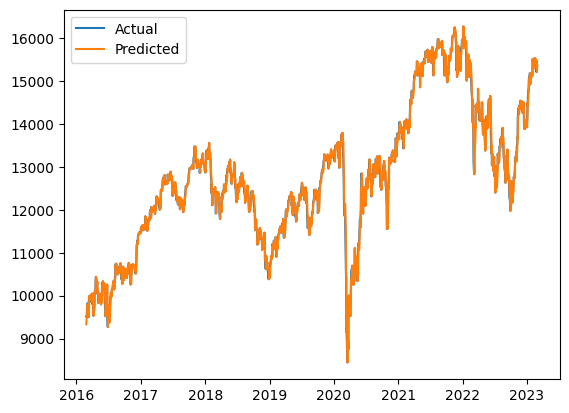

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import pmdarima as pm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from google.colab import files
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

start_date = '1987-01-01'
end_date = '2023-03-01'

dax_data = pdr.data.get_data_yahoo('^GDAXI', start=start_date, end=end_date)
dax_data = dax_data[['Close']]

train_size = int(len(dax_data) * 0.8)
train_data = dax_data.iloc[:train_size]
test_data = dax_data.iloc[train_size:]
test_dates = test_data.index

arima_model = pm.auto_arima(train_data['Close'], seasonal=False, suppress_warnings=True)
order = arima_model.order
print("ORDER FOUND: ", order)

predictions = []

training_data = train_data['Close'].values
test_data = test_data['Close']
test_data_index = test_data.index
test_data_array = test_data.values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data_array)

model = pm.ARIMA(order=order)
model.fit(history)
last_progress_percent = 0
for i in range(N_test_observations):
    yhat, _ = model.predict(n_periods=1, return_conf_int=True)
    model_predictions.append(yhat[0])
    obs = test_data_array[i]
    history.append(obs)
    model.update(obs)
    progress_percent = (i+1) / N_test_observations * 100

    # Check if progress has moved by at least 1%
    if progress_percent - last_progress_percent >= 1:
        # Print progress
        print(f"Progress: {progress_percent:.1f}%")

        # Update last progress percentage
        last_progress_percent = progress_percent
errors = np.abs(test_data_array - model_predictions)
mean_absolute_error = errors.mean()
mean_absolute_percentage_error = (errors / test_data_array).mean() * 100
median_absolute_percentage_error = np.median(errors / test_data_array) * 100

print("Mean Absolute Error:", mean_absolute_error)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error)
print("Median Absolute Percentage Error:", median_absolute_percentage_error)

# Save results to a CSV file
csv_filename = f"dax_predictions_{start_date}_to_{end_date}.csv"
results_df = pd.DataFrame({'Date': test_dates, 'Actual': test_data_array, 'Predicted': model_predictions})
results_df.to_csv(csv_filename, index=False)
plt.plot(test_dates, test_data_array, label='Actual')
plt.plot(test_dates, model_predictions, label='Predicted')
plt.legend()
plt.show()

files.download(csv_filename)


ARIMA for CAC40

[*********************100%***********************]  1 of 1 completed
ORDER FOUND:  (2, 1, 3)
Progress: 1.0%
Progress: 2.0%
Progress: 3.0%
Progress: 4.1%
Progress: 5.1%
Progress: 6.1%
Progress: 7.1%
Progress: 8.1%
Progress: 9.1%
Progress: 10.1%
Progress: 11.2%
Progress: 12.2%
Progress: 13.2%
Progress: 14.2%
Progress: 15.2%
Progress: 16.2%
Progress: 17.2%
Progress: 18.3%
Progress: 19.3%
Progress: 20.3%
Progress: 21.3%
Progress: 22.3%
Progress: 23.3%
Progress: 24.3%
Progress: 25.4%
Progress: 26.4%
Progress: 27.4%
Progress: 28.4%
Progress: 29.4%
Progress: 30.4%
Progress: 31.4%
Progress: 32.5%
Progress: 33.5%
Progress: 34.5%
Progress: 35.5%
Progress: 36.5%
Progress: 37.5%
Progress: 38.5%
Progress: 39.6%
Progress: 40.6%
Progress: 41.6%
Progress: 42.6%
Progress: 43.6%
Progress: 44.6%
Progress: 45.6%
Progress: 46.7%
Progress: 47.7%
Progress: 48.7%
Progress: 49.7%
Progress: 50.7%
Progress: 51.7%
Progress: 52.7%
Progress: 53.8%
Progress: 54.8%
Progress: 55.8%
Progress: 56.8%
Progress: 57.8%
Prog

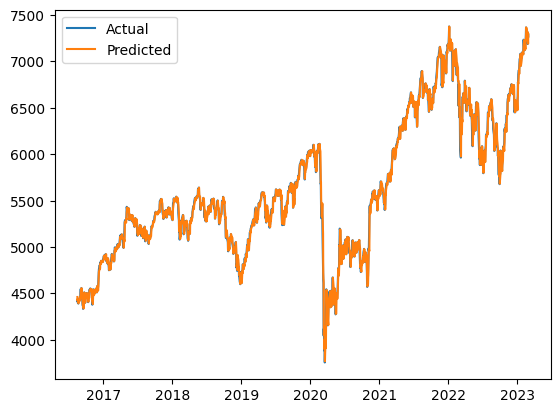

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import pmdarima as pm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from google.colab import files
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

start_date = '1987-01-01'
end_date = '2023-03-01'

cac40_data = pdr.data.get_data_yahoo('^FCHI', start=start_date, end=end_date)
cac40_data = cac40_data[['Close']]

train_size = int(len(cac40_data) * 0.8)
train_data = cac40_data.iloc[:train_size]
test_data = cac40_data.iloc[train_size:]
test_dates = test_data.index

arima_model = pm.auto_arima(train_data['Close'], seasonal=False, suppress_warnings=True)
order = arima_model.order
print("ORDER FOUND: ", order)

predictions = []

training_data = train_data['Close'].values
test_data = test_data['Close']
test_data_index = test_data.index
test_data_array = test_data.values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data_array)

model = pm.ARIMA(order=order)
model.fit(history)
last_progress_percent = 0
for i in range(N_test_observations):
    yhat, _ = model.predict(n_periods=1, return_conf_int=True)
    model_predictions.append(yhat[0])
    obs = test_data_array[i]
    history.append(obs)
    model.update(obs)
    progress_percent = (i+1) / N_test_observations * 100

    # Check if progress has moved by at least 1%
    if progress_percent - last_progress_percent >= 1:
        # Print progress
        print(f"Progress: {progress_percent:.1f}%")

        # Update last progress percentage
        last_progress_percent = progress_percent
errors = np.abs(test_data_array - model_predictions)
mean_absolute_error = errors.mean()
mean_absolute_percentage_error = (errors / test_data_array).mean() * 100
median_absolute_percentage_error = np.median(errors / test_data_array) * 100

print("Mean Absolute Error:", mean_absolute_error)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error)
print("Median Absolute Percentage Error:", median_absolute_percentage_error)

# Save results to a CSV file
csv_filename = f"cac40_predictions_{start_date}_to_{end_date}.csv"
results_df = pd.DataFrame({'Date': test_dates, 'Actual': test_data_array, 'Predicted': model_predictions})
results_df.to_csv(csv_filename, index=False)
plt.plot(test_dates, test_data_array, label='Actual')
plt.plot(test_dates, model_predictions, label='Predicted')
plt.legend()
plt.show()

files.download(csv_filename)


Plotting the comparison between the ARIMA, LSTM and actual value

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.ticker as ticker
def plot_and_save_comparison(actual_file, lstm_file, title, output_file):
    # Load data from CSV files
    data1 = pd.read_csv(actual_file, parse_dates=["Date"], index_col="Date")
    data2 = pd.read_csv(lstm_file)

    # Determine which DataFrame is longer and remove the first row(s) accordingly
    if len(data1) > len(data2):
        data1 = data1.iloc[len(data1) - len(data2):]
    elif len(data1) < len(data2):
        data2 = data2.iloc[len(data2) - len(data1):]

    # Set the index of data2 to be the same as data1
    data2.index = data1.index

    # Extract actual and predicted values from both files
    actual1 = data1["Actual"]
    predicted1 = data1["Predicted"]
    predicted2 = data2["y_pred"]

    # Plot the data
    plt.figure(figsize=(24, 11))

    # Plot the data with different line styles and increased line width
    plt.plot(actual1, color="black", label="Actual", linestyle="-", linewidth=1)
    plt.plot(predicted1, color="red", label="ARIMA", linestyle=":", linewidth=1)
    plt.plot(predicted2, color="darkgreen", label="LSTM", linestyle=":", linewidth=1)
    # Set title and labels with increased font size
    plt.title(title, fontsize=26)
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Value", fontsize=20)

    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.legend(fontsize=18)


    # Save the plot as an image
    plt.savefig(output_file, dpi=300)
    plt.close()
    files.download(output_file)

# Call the function for each comparison
# Call the function for each comparison
plot_and_save_comparison("cac40_predictions_1987-01-01_to_2023-03-01.csv",
                         "LSTM_predictions_cac40_1987-01-01_2023-03-01_50_16_44.676798769822724_0.8080106484101229_0.5536058505124649.csv",
                         "CAC 40",
                         "CAC_40_comparison.png")

plot_and_save_comparison("dax_predictions_1987-01-01_to_2023-03-01.csv",
                         "LSTM_predictions_dax_1987-01-01_2023-03-01_50_16_109.55897843978616_0.870005784780846_0.6349928602147102.csv",
                         "DAX",
                         "DAX_comparison.png")

plot_and_save_comparison("hsi_predictions_1969-11-24_to_2023-03-01.csv",
                         "LSTM_predictions_hsi_1969-11-24_2023-03-01_50_16_254.40408952643557_1.0524233947927903_0.7823843226862116.csv",
                         "HSI",
                         "HSI_comparison.png")

plot_and_save_comparison("sp500_predictions_1957-03-04_to_2023-03-01.csv",
                         "LSTM_predictions_SP500_1957-03-04_2023-03-01_50_16_23.858646601815312_1.0187515990169003_0.7628676168475451.csv",
                         "S&P 500",
                         "SP500_comparison.png")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculating 95% confidence intervals and t-test between the models

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Function for calculating the confidence intervals
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, se = np.mean(data), stats.sem(data)
    margin_of_error = se * stats.t.ppf((1 + confidence) / 2, n - 1)
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Read the CSV files
arima_csv_files = [
    "cac40_predictions_1987-01-01_to_2023-03-01.csv",
    "dax_predictions_1987-01-01_to_2023-03-01.csv",
    "hsi_predictions_1969-11-24_to_2023-03-01.csv",
    "sp500_predictions_1957-03-04_to_2023-03-01.csv",
]

lstm_csv_files = [
    "LSTM_predictions_cac40_1987-01-01_2023-03-01_50_16_44.676798769822724_0.8080106484101229_0.5536058505124649.csv",
    "LSTM_predictions_dax_1987-01-01_2023-03-01_50_16_109.55897843978616_0.870005784780846_0.6349928602147102.csv",
    "LSTM_predictions_hsi_1969-11-24_2023-03-01_50_16_254.40408952643557_1.0524233947927903_0.7823843226862116.csv",
    "LSTM_predictions_SP500_1957-03-04_2023-03-01_50_16_23.858646601815312_1.0187515990169003_0.7628676168475451.csv",
]




for arima_csv, lstm_csv in zip(arima_csv_files, lstm_csv_files):
    data1 = pd.read_csv(arima_csv)
    data2 = pd.read_csv(lstm_csv)
    data1 = data1.iloc[1:]
    actual = data1["Actual"]
    arima_predicted = data1["Predicted"]
    lstm_predicted = data2["y_pred"]

    if len(arima_predicted) != len(lstm_predicted):
        print(f"Error: Lengths of ARIMA and LSTM predictions are not equal for {arima_csv} and {lstm_csv}.")
        print(f"Length of ARIMA predictions: {len(arima_predicted)}")
        print(f"Length of LSTM predictions: {len(lstm_predicted)}")
        continue

    # Paired t-test
    p_value = stats.ttest_rel(arima_predicted, lstm_predicted).pvalue

    # Confidence intervals
    arima_ci = mean_confidence_interval(arima_predicted)
    lstm_ci = mean_confidence_interval(lstm_predicted)

    # Print results for each stock index
    print(f"Results for {arima_csv} and {lstm_csv}:")
    print(f"p-value: {p_value}")
    print(f"ARIMA CI: {arima_ci}, LSTM CI: {lstm_ci}\n")


Results for cac40_predictions_1987-01-01_to_2023-03-01.csv and LSTM_predictions_cac40_1987-01-01_2023-03-01_50_16_44.676798769822724_0.8080106484101229_0.5536058505124649.csv:
p-value: 1.2864468723961744e-94
ARIMA CI: (5582.563834304807, 5653.185404136517), LSTM CI: (5589.45696132489, 5659.7799645258565)

Results for dax_predictions_1987-01-01_to_2023-03-01.csv and LSTM_predictions_dax_1987-01-01_2023-03-01_50_16_109.55897843978616_0.870005784780846_0.6349928602147102.csv:
p-value: 1.0284127266722253e-08
ARIMA CI: (12688.106504352956, 12839.419660967553), LSTM CI: (12683.981498461264, 12832.423341718815)

Results for hsi_predictions_1969-11-24_to_2023-03-01.csv and LSTM_predictions_hsi_1969-11-24_2023-03-01_50_16_254.40408952643557_1.0524233947927903_0.7823843226862116.csv:
p-value: 6.139765644388998e-121
ARIMA CI: (24976.582303399544, 25303.25111165448), LSTM CI: (25047.613706796994, 25368.049520093762)

Results for sp500_predictions_1957-03-04_to_2023-03-01.csv and LSTM_predictions_S

Testing the nature of the destribution between the residuals to decide if the 95%CI and t-test are significant to the results

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro

# Function for calculating the confidence intervals
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, se = np.mean(data), stats.sem(data)
    margin_of_error = se * stats.t.ppf((1 + confidence) / 2, n - 1)
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Function to perform Shapiro-Wilk test for normality
def normality_test(data):
    stat, p = shapiro(data)
    return p > 0.05

# Load the CSV files
arima_csv_files = ["cac40_predictions_1987-01-01_to_2023-03-01.csv", "dax_predictions_1987-01-01_to_2023-03-01.csv", "hsi_predictions_1969-11-24_to_2023-03-01.csv", "sp500_predictions_1957-03-04_to_2023-03-01.csv"]
lstm_csv_files = ["LSTM_predictions_cac40_1987-01-01_2023-03-01_50_16_44.676798769822724_0.8080106484101229_0.5536058505124649.csv", "LSTM_predictions_dax_1987-01-01_2023-03-01_50_16_109.55897843978616_0.870005784780846_0.6349928602147102.csv", "LSTM_predictions_hsi_1969-11-24_2023-03-01_50_16_254.40408952643557_1.0524233947927903_0.7823843226862116.csv", "LSTM_predictions_SP500_1957-03-04_2023-03-01_50_16_23.858646601815312_1.0187515990169003_0.7628676168475451.csv"]

for arima_csv, lstm_csv in zip(arima_csv_files, lstm_csv_files):
    data1 = pd.read_csv(arima_csv).iloc[1:]
    data2 = pd.read_csv(lstm_csv)

    actual = data1["Actual"]
    arima_predicted = data1["Predicted"]
    lstm_predicted = data2["y_pred"]

    arima_residuals = actual - arima_predicted
    lstm_residuals = actual - lstm_predicted

    if not normality_test(arima_residuals):
        print(f"Warning: ARIMA residuals in {arima_csv} do not appear to be normally distributed.")
    if not normality_test(lstm_residuals):
        print(f"Warning: LSTM residuals in {lstm_csv} do not appear to be normally distributed.")

    # Continue with your paired t-test and confidence intervals...
